### Business Understanding
TED was founded in 1984 by Richard Saulman who have observation of a powerful convergencce among three fields: technology, entertainment and design. The first six TED Talks was posted online on Jun 27, 2006 and they had reached more than one million views by September 2006. In 2007, TED talks was so popular that the website was relaunched around them, gving a global audience free access to some of the world's greatest thinkers, leadders and teachers. TED has a mission of spreading ideas. Ted is global community, welcoming people from every discipline and culture who seek a deeper understanding of the world. Since the time I begin watching TED talks in my college, I have learned an incredible amount, from different fields and cultures. I wanted to finding an insight about the world of TED on its speakers and viewers to answer a few question that I had. 
Q1 Which are the most viewed and most favorited Talks of all time?
Q2 What kind of topics attract the maximum discussion and debate(in the form of comments)?
Q3 Who have managed to inspire millions of people through their talks on the TED Platform?


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [4]:
ted = pd.read_csv("E:/Udacity document/TED talks/ted_main.csv")
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [33]:
len(ted)

2550

We have 2550 talks at our diposal. These represent all the talks that have ever posted on the TED Talks platform until Sept, 2017. The TED dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. 

## Prepare Data and Clean

In [6]:
#count the number of missing values in each column
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [7]:
#reorder the columns
ted_arrange=ted[['name','title','description','main_speaker','speaker_occupation','num_speaker','duration','event','film_date','published_date','comments','tags','languages','ratings','related_talks','url','views']]

In [8]:
ted_arrange.describe()

,num_speaker,duration,film_date,published_date,comments,languages,views
count,2550.000000,2550.000000,2.550000e+03,2.550000e+03,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,1.321928e+09,1.343525e+09,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,1.197391e+08,9.464009e+07,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,7.464960e+07,1.151367e+09,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,1.257466e+09,1.268463e+09,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,1.333238e+09,1.340935e+09,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,1.412964e+09,1.423432e+09,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,1.503792e+09,1.506092e+09,6404.000000,72.000000,4.722711e+07


## Q1 Which are the most viewed and most favorited Talks of all time?

In [9]:
popular_talks=ted_arrange[['title','main_speaker','views','film_date']].sort_values('views', ascending=False)
popular_talks.head(10)

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,1140825600
1346,Your body language may shape who you are,Amy Cuddy,43155405,1340668800
677,How great leaders inspire action,Simon Sinek,34309432,1253145600
837,The power of vulnerability,Brené Brown,31168150,1275782400
452,10 things you didn't know about orgasm,Mary Roach,22270883,1233878400
1776,How to speak so that people want to listen,Julian Treasure,21594632,1370822400
201,My stroke of insight,Jill Bolte Taylor,21190883,1204070400
5,Why we do what we do,Tony Robbins,20685401,1138838400
2114,This is what happens when you reply to spam email,James Veitch,20475972,1449532800
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,1351296000


1. Ken Robinson's talk on Do Schools Kill Creativity? is the most popular Ted Talk of all time with 4.72million views. 
2. Robinson's talk is closely followed by Amy Cuddy's Your body language may shape who you are. 
3. There are only 2 talks that have surpassed 40million mark. Robinson's talk was filmed on 2006 and Cuddy's talk was filmed on 2012. 
4. There are 2 talk that havve surpassed 30million mark which is Simon Sinek's How great leaders inspire action and Brene Brown's The power of vulnerability. 

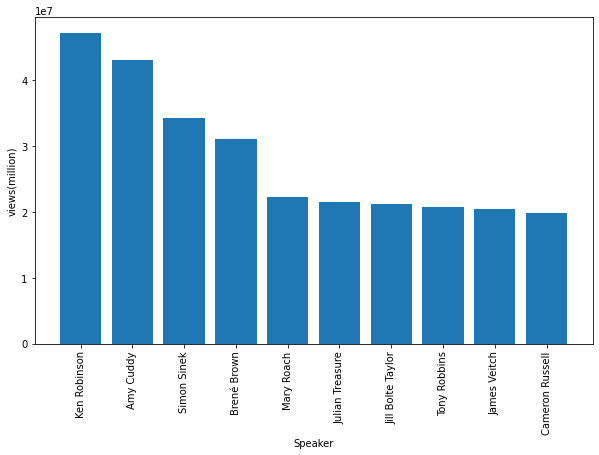

In [10]:
speaker=popular_talks['main_speaker'].head(10)
views=popular_talks['views'].head(10)

#figure size
fig = plt.figure(figsize=(10,6))

#Bar plot
plt.bar(speaker, views)
plt.xlabel('Speaker')
plt.ylabel('views(million)')
plt.xticks(rotation=90)
plt.show()

In [11]:
ted_arrange['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of view on TED Talks in 1.6million and the median number of views is 1.12million. We also noticed that the majority of talks have less than 4million. This will be consider as the cutoff poiint when construction box plots. 

## Q2 What kind of topics attract the maximum discussion and debate(in the form of comments)?

In [12]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

1. There are average 191.5 comments on every TED Talks. We can said that the TED Online Community is highly involved in discussion revolving TED Talks. 
2. There is huge standard deviation associated witht the comments. It is larger than the mean suggesting that the measures may be sensitive to outliers. 
3. The minimum number of comments on TED talks is 2 while the maximum is 6404. 

<AxesSubplot:>

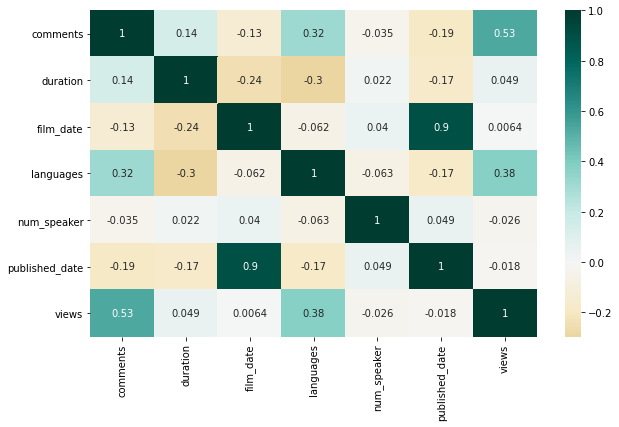

In [13]:
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(ted.corr(), center=0, cmap='BrBG', annot=True)

From the heatmap, the number of views have positive relationship with language and comments. the number of views have negative relationship with published date and number of speaker. 

<AxesSubplot:xlabel='views', ylabel='comments'>

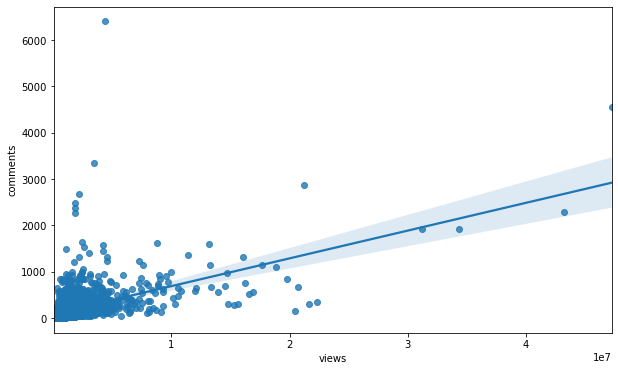

In [14]:
fig, ax =plt.subplots(figsize=(10,6))
sns.regplot(data=ted,x='views',y='comments',ax=ax)

In [15]:
#check number of views and comments on the 10most commented TED talks of all time.
ted[['title','main_speaker','views','comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


1. Richard Dawkin's talk on Militant Atheism generated the greatest amount of discussion and opions but having significantly lesser views than Ken Robinson's talk. 
Which talks tendd to attract the largest amount of discussion?

In [16]:
#creating a new column 'comments_per_view'
ted['comments_per_view']=ted.comments/ted.views

ted[['title','main_speaker','views','comments','comments_per_view']].sort_values('comments_per_view',ascending=False).head(10)

,title,main_speaker,views,comments,comments_per_view
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220
803,E-voting without fraud,David Bismark,543551,834,0.001534
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236
661,The danger of science denial,Michael Specter,1838628,2272,0.001236
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235


This analsis raised interesting insight. Half of the talks in the top 10 are on the lines of Faith and Region. Faith and Region might be a very hot debated topic in 21st century. The most discussed talk is The case for same-sex marriage by Diane J. Savino which has religious undertones. 

## Q3 Who have managed to inspire millions of people through their talks on the TED Platform?
insight about all amazing speaker who have managed to inspire millions of people throught their talks on TED. 

In [27]:
#most popular speakers give the most talks 
speaker_df=ted.groupby('main_speaker').count().reset_index()[['main_speaker','comments']]
speaker_df.columns=['main_speaker','appearances']
speaker_df=speaker_df.sort_values('appearances',ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


Hans Rosling is the most popular TED speaker with 9 appearances on the TED Talks. Juan Enriquez has 7 appearance. Rives and March Tempest has 6 appearance on TED Talks. 


In [18]:
occupation_df=ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation','comments']]
occupation_df.columns=['occupation','appearances']
occupation_df=occupation_df.sort_values('appearances', ascending=False)
occupation_df.head()

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31


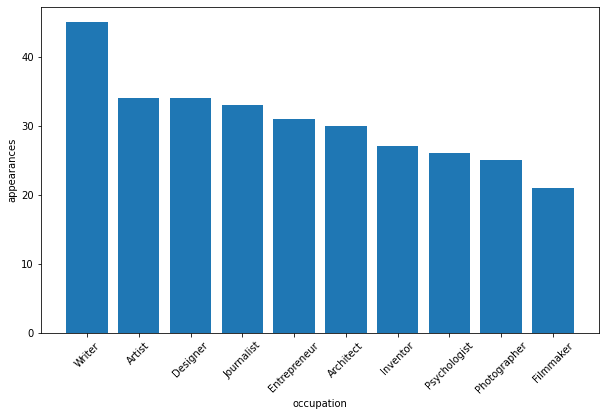

In [36]:
x=occupation_df['occupation'].head(10)
y=occupation_df['appearances'].head(10)
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('occupation')
plt.ylabel('appearances')
plt.xticks(rotation=45)
plt.show()

1.Writers are the most popular with 45 speakers identifying themselves.
2. Artist and Desginer are the second most popular with 34 speakers in each category. 

Do some professions tend to attract a larger number of views? 

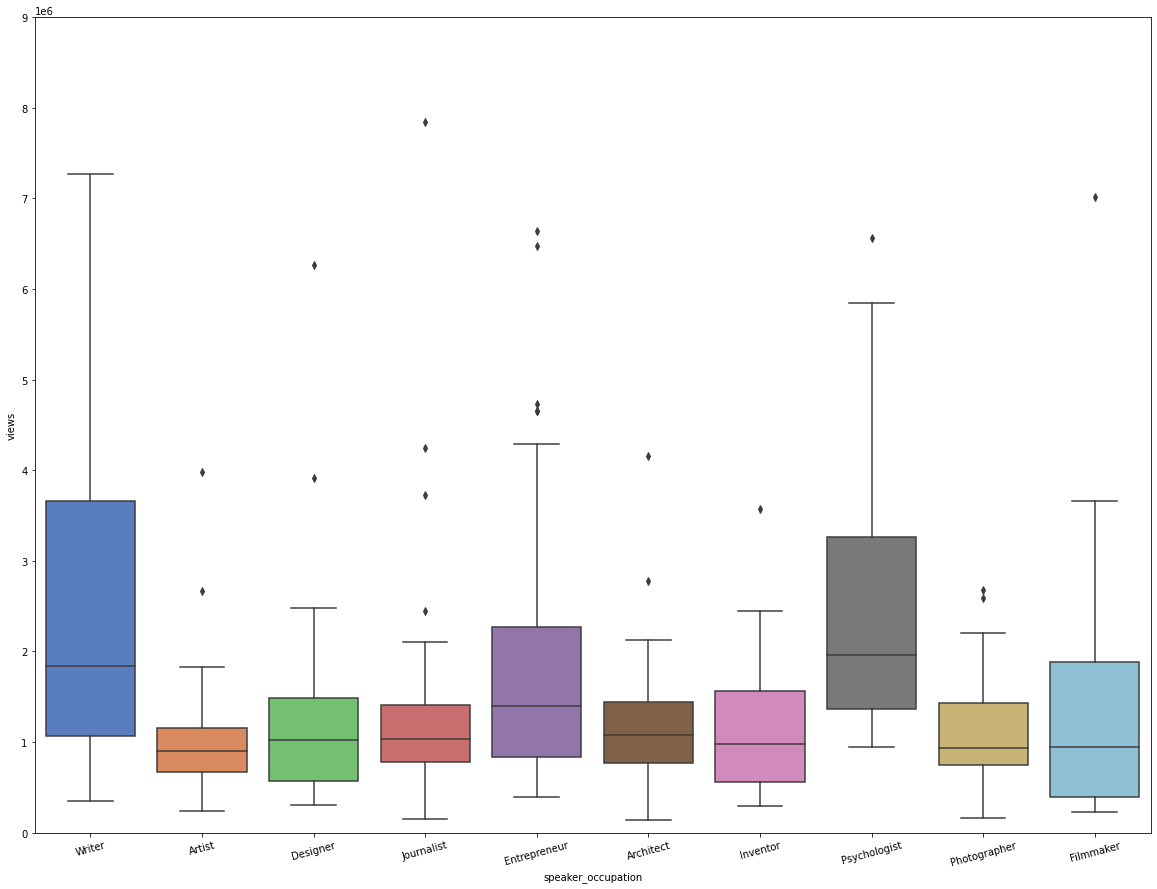

In [20]:
occupation=['Writer','Artist','Designer','Journalist','Entrepreneur','Architect','Inventor','Psychologist','Photographer','Filmmaker']
vclasses=pd.api.types.CategoricalDtype(ordered=True, categories=occupation)

ted['speaker_occupation']=ted['speaker_occupation'].astype(vclasses)

fig, ax= plt.subplots(nrows =1, ncols=1,figsize= [20,15])
bx= sns.boxplot(data=ted[ted['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], x='speaker_occupation',y='views', palette="muted")
plt.xticks(rotation=15)
bx.set(ylim=[0,  0.9e7])
plt.show()


1. The writer has the highest view and the Artist has the lowest views. 
2. The Writer has much longest "whiskers" which can interpret that they vary more widely in the total of views. 
3. The Psychologist has the highest median point for the total of views 